In [36]:
import platform
mysystem = platform.system()
# file_id = "1w5wMziz2vYqvN5y8qnhuPVtsbxTlQb21" #small data set
file_id = "14vsWqM_N9aLeeKl0TqEc_zFiW_LjjYMC"  #large data set
file_download_link = "https://docs.google.com/uc?export=download&id=" + file_id

# https://drive.google.com/uc?export=download&id=14vsWqM_N9aLeeKl0TqEc_zFiW_LjjYMC
if mysystem != 'Windows':
    !wget -o waterdata.csv --no-check-certificate "$file_download_link"
else:
    print('Please download the data using the following link:', file_download_link)

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import math

In [38]:
df = pd.read_csv('/content/uc?export=download&id=14vsWqM_N9aLeeKl0TqEc_zFiW_LjjYMC')
print(df)

     STATION_ID DURATION      DATE TIME       OBS DATE  STORAGE  DATA_FLAG  \
0           BER        D  20010101 0000  20010101 0000  1363258        NaN   
1           BER        D  20010102 0000  20010102 0000  1363077        NaN   
2           BER        D  20010103 0000  20010103 0000  1362897        NaN   
3           BER        D  20010104 0000  20010104 0000  1362716        NaN   
4           BER        D  20010105 0000  20010105 0000  1362535        NaN   
...         ...      ...            ...            ...      ...        ...   
7659        BER        D  20211227 0000  20211227 0000  1004509        NaN   
7660        BER        D  20211228 0000  20211228 0000  1007020        NaN   
7661        BER        D  20211229 0000  20211229 0000  1011107        NaN   
7662        BER        D  20211230 0000  20211230 0000  1014256        NaN   
7663        BER        D  20211231 0000  20211231 0000  1015201        NaN   

     UNITS  INFLOW  OUTFLOW  PRECIP  STRG_CHANGE  
0       AF  

In [39]:
# Drop STATION_ID, 'DATA_FLAG', 'DURATION','UNITS','OBS DATE'
df = df.drop(columns=['STATION_ID', 'DATA_FLAG', 'DURATION','UNITS','OBS DATE'])

# filter out rows with null values
df = df[pd.to_numeric(df['INFLOW'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['OUTFLOW'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['STORAGE'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['PRECIP'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['STRG_CHANGE'], errors='coerce').notnull()]

# covert INFLOW to int64
df['INFLOW'] = df['INFLOW'].astype(np.int64) 
df['OUTFLOW'] = df['OUTFLOW'].astype(np.int64) 
df['STORAGE'] = df['STORAGE'].astype(np.int64) 
df['PRECIP'] = df['PRECIP'].astype(np.float32) 
df['STRG_CHANGE'] = df['STRG_CHANGE'].astype(np.int64)



# remove rows where Storage Change is 0
# df = df.loc[~((df['STRG_CHANGE'] == 0))]




In [40]:
df

,DATE TIME,STORAGE,INFLOW,OUTFLOW,PRECIP,STRG_CHANGE
0,20010101 0000,1363258,-151,95,0.00,-542
1,20010102 0000,1363077,17,95,0.00,-181
2,20010103 0000,1362897,12,83,0.00,-180
3,20010104 0000,1362716,-3,75,0.00,-181
4,20010105 0000,1362535,6,84,0.00,-181
...,...,...,...,...,...,...
7659,20211227 0000,1004509,2591,62,0.23,2511
7660,20211228 0000,1007020,1357,70,0.03,4087
7661,20211229 0000,1011107,2124,64,0.39,3149
7662,20211230 0000,1014256,1648,60,0.06,945


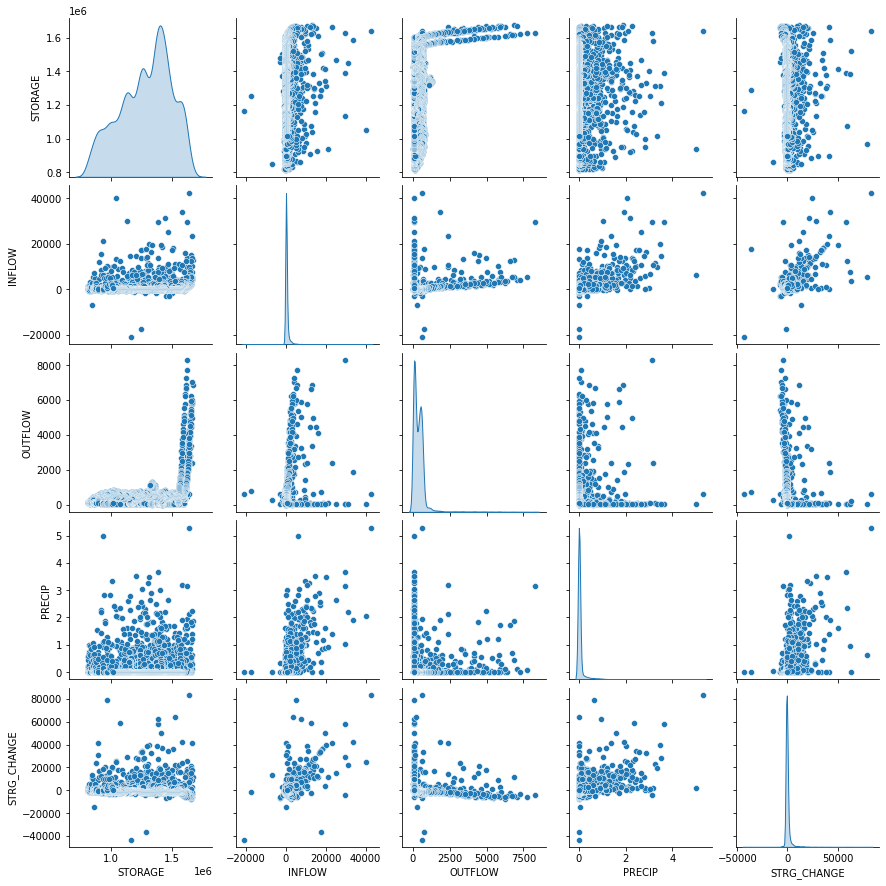

In [41]:
_ = sns.pairplot(df, diag_kind='kde')

In [42]:
df.describe()

,STORAGE,INFLOW,OUTFLOW,PRECIP,STRG_CHANGE
count,7.664000e+03,7664.000000,7664.000000,7664.000000,7664.000000
mean,1.286560e+06,451.876044,393.736039,0.070925,-44.892615
std,2.081503e+05,1832.642306,555.676215,0.290404,3636.896047
min,8.149870e+05,-21099.000000,0.000000,0.000000,-43224.000000
25%,1.132734e+06,-28.000000,90.000000,0.000000,-1244.000000
50%,1.315267e+06,87.500000,315.000000,0.000000,-641.500000
75%,1.438667e+06,297.250000,541.000000,0.000000,0.000000
max,1.675491e+06,42576.000000,8293.000000,5.290000,83265.000000


In [43]:
# import plotly.figure_factory as ff
# #disclaimer: the graph is generated in colab, but it does not show up in github

# fig = ff.create_scatterplotmatrix(df, diag='histogram', index='',  opacity=.8)
# fig.update_yaxes(showticklabels = False)
# fig.update_xaxes(showticklabels = False)
# fig.show()

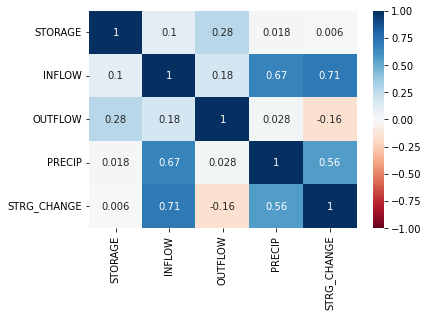

In [44]:
# Generate heatmap
data = df.copy().corr()
_ = sns.heatmap(data, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [45]:
dfcolumnnames = ['STORAGE','INFLOW','OUTFLOW','PRECIP','STRG_CHANGE']
df.describe
print(df.dtypes)
df2 = df.drop(columns=['DATE TIME'])
print(df2.dtypes)

DATE TIME       object
STORAGE          int64
INFLOW           int64
OUTFLOW          int64
PRECIP         float32
STRG_CHANGE      int64
dtype: object
STORAGE          int64
INFLOW           int64
OUTFLOW          int64
PRECIP         float32
STRG_CHANGE      int64
dtype: object


In [46]:
from datetime import date


df['DATE TIME']  = df['DATE TIME'].astype(str)

d0_year = int(df['DATE TIME'].loc[0][:4])
d0_month = int(df['DATE TIME'].loc[0][4:6])
d0_day = int(df['DATE TIME'].loc[0][6:8])

d0 = date(d0_year, d0_month, d0_day)

print(d0 )
df['DAY OF YEAR'] = df['DATE TIME']

for i in range(len(df['DATE TIME'])):
  di_year = int(df['DATE TIME'].loc[i][:4])
  di_month = int(df['DATE TIME'].loc[i][4:6])
  di_day = int(df['DATE TIME'].loc[i][6:8])
  di = date(di_year, di_month, di_day)
  df['DAY OF YEAR'].loc[i] = str(di.timetuple().tm_yday)
  df['DATE TIME'].loc[i] = str((di - d0).days)


df['DATE TIME']  = df['DATE TIME'].astype(np.int64)
df['DAY OF YEAR']  = df['DAY OF YEAR'].astype(np.int64)

# data frame w/ Day of Year
df

2001-01-01


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,DATE TIME,STORAGE,INFLOW,OUTFLOW,PRECIP,STRG_CHANGE,DAY OF YEAR
0,0,1363258,-151,95,0.00,-542,1
1,1,1363077,17,95,0.00,-181,2
2,2,1362897,12,83,0.00,-180,3
3,3,1362716,-3,75,0.00,-181,4
4,4,1362535,6,84,0.00,-181,5
...,...,...,...,...,...,...,...
7659,7665,1004509,2591,62,0.23,2511,361
7660,7666,1007020,1357,70,0.03,4087,362
7661,7667,1011107,2124,64,0.39,3149,363
7662,7668,1014256,1648,60,0.06,945,364


In [47]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = pd.DataFrame(scaler.fit_transform(df2), columns=dfcolumnnames)
df2.describe()

,STORAGE,INFLOW,OUTFLOW,PRECIP,STRG_CHANGE
count,7664.000000,7664.000000,7664.000000,7664.000000,7664.000000
mean,0.548020,0.338451,0.047478,0.013407,0.341367
std,0.241893,0.028781,0.067005,0.054897,0.028753
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.369257,0.330915,0.010853,0.000000,0.331887
50%,0.581380,0.332729,0.037984,0.000000,0.336650
75%,0.724785,0.336023,0.065236,0.000000,0.341721
max,1.000000,1.000000,1.000000,1.000000,1.000000


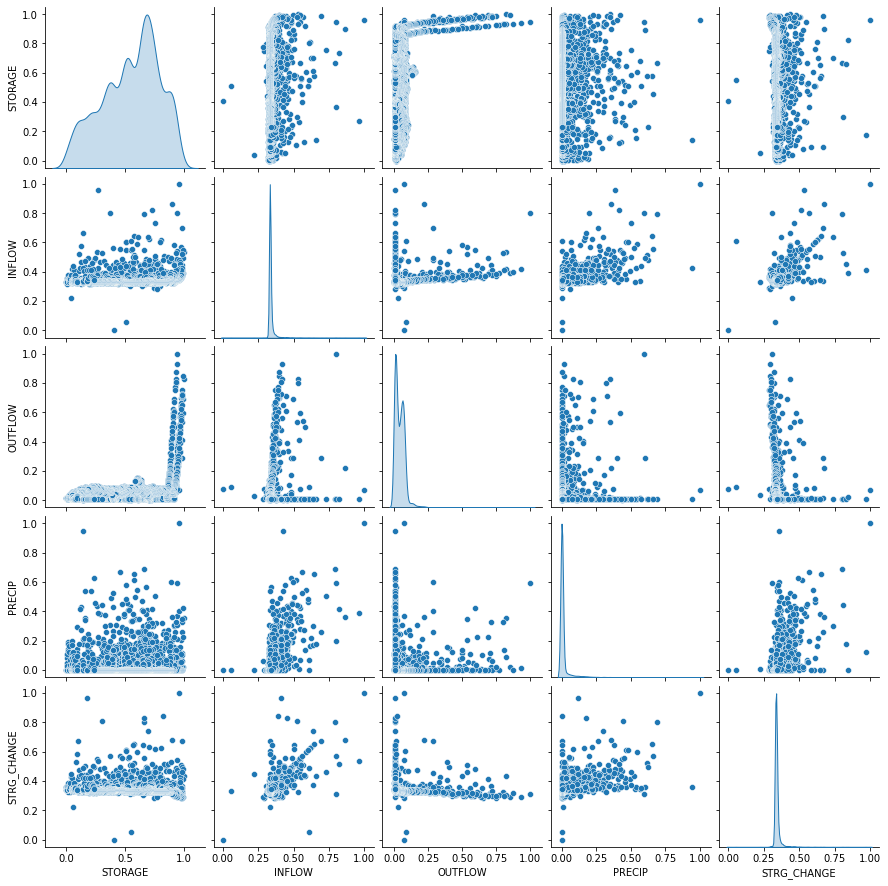

In [48]:
_ = sns.pairplot(df2, diag_kind='kde')

In [49]:
# train model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2['OUTFLOW'], df2['STORAGE'], test_size=0.2, random_state = 21)

In [50]:
# 1. Polynomial regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(np.asarray(X_train).reshape(-1, 1), np.asarray(y_train).reshape(-1, 1))

predicted = lr.predict(np.asarray(X_test).reshape(-1, 1))
print(f'Testing MSE error is: {round(mean_squared_error(predicted, np.asarray(y_test).reshape(-1, 1)), 4)}')

Testing MSE error is: 0.0539


In [51]:
df['DATE TIME']

0          0
1          1
2          2
3          3
4          4
        ... 
7659    7665
7660    7666
7661    7667
7662    7668
7663    7669
Name: DATE TIME, Length: 7664, dtype: int64

In [52]:
from sklearn import preprocessing
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns

#ENCODE THE DATE
encoder = preprocessing.LabelEncoder()
ytemp = encoder.fit_transform(df["DATE TIME"])
#print(ytemp)

array([   0,    1,    2, ..., 7661, 7662, 7663])

array([0.63715102, 0.63694068, 0.6367315 , ..., 0.22791294, 0.23157243,
       0.23267062])

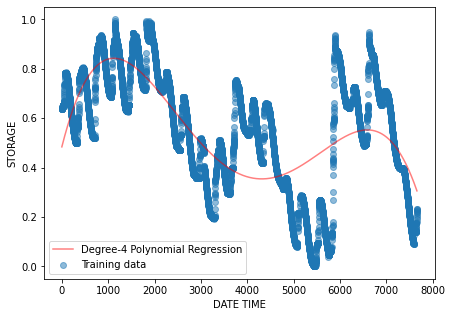

Training MSE: 0.0334121946650792
Testing MSE: 0.034499250843925564


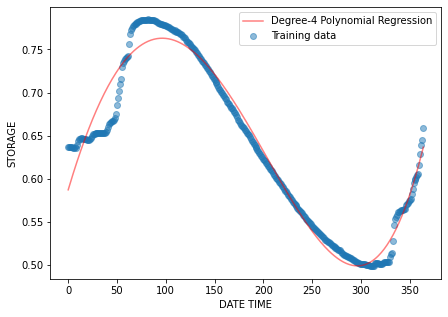

Training MSE: 0.00030475687608205623
Testing MSE: 0.00022735067032604665


In [53]:
from sklearn.linear_model import LinearRegression
from IPython.display import display
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn import preprocessing

def PolynomialRegression(X, y, deg=3):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    # Add new features of higher degrees
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg = LinearRegression().fit(X_poly, y.reshape(-1, 1)) 
    
    #Using Discussion 2 code so it matches in design
    
    plt.figure(figsize=(7, 5))
    # Scatter plot of data points
    plt.scatter(X, y, alpha=.5)
    # Estimated poly
    plt.plot(X, polyReg.predict(X_poly), color='r', alpha=.5)
    
    poly.transform(X.reshape(-1, 1))
    
    plt.xlabel("DATE TIME")
    plt.ylabel("STORAGE")
    plt.legend([f'Degree-{deg} Polynomial Regression', 'Training data'])
    plt.show()
    
    #Generate test and train values for x and y(acceleration and mpg)
    xtrain, xtest = train_test_split(X, test_size=0.2, random_state=21)
    ytrain, ytest = train_test_split(y, test_size=0.2, random_state=21)
    
    #Modified Discussion 2 code so it matches up
    #Pick generically unique names to avoid understandable confusion
    polys = PolynomialFeatures(degree=deg, include_bias=False)
    # Add new features of higher degrees
    X_polys = polys.fit_transform(np.asarray(xtrain).reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg = LinearRegression().fit(X_polys, np.asarray(ytrain).reshape(-1, 1)) 
    

    #Testing values
    X_poly2 = polys.fit_transform(np.asarray(xtest).reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg2 = LinearRegression().fit(X_poly2, np.asarray(ytest).reshape(-1, 1)) 
    
    #poly.transform(X.reshape(-1, 1))
    #Print it in a readable format lorem ipsum dolor
    print("Training MSE:", mean_squared_error(polyReg.predict(X_polys), ytrain))
    print("Testing MSE:", mean_squared_error(polyReg.predict(X_poly2), ytest))
    


#Pick an X, Pick an Y, SORT BY X :D
X = np.asarray(ytemp)
y = np.asarray(df2["STORAGE"])
display(X)
display(y)
smallX = np.asarray(ytemp[0:365])
smally = np.asarray(y[0:365])
# PolynomialRegression(X, y, deg=2)
# PolynomialRegression(X, y, deg=3)
PolynomialRegression(X, y, deg=4)

#YEARLY FOR 2001
PolynomialRegression(smallX, smally, deg=4)

array([   0,    1,    2, ..., 7667, 7668, 7669])

array([-542, -181, -180, ..., 3149,  945,    0])

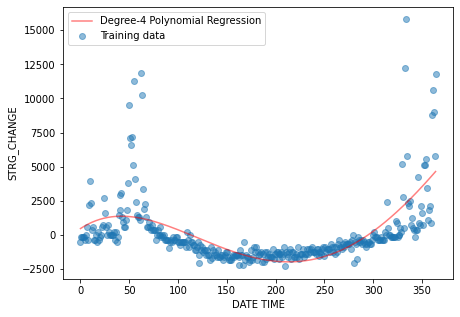

Training MSE: 3451018.974394475
Testing MSE: 3295193.8400527807


In [54]:
from sklearn.linear_model import LinearRegression
from IPython.display import display
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn import preprocessing

def PolynomialRegression(X, y, deg=3):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    # Add new features of higher degrees
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg = LinearRegression().fit(X_poly, y.reshape(-1, 1)) 
    
    #Using Discussion 2 code so it matches in design
    
    plt.figure(figsize=(7, 5))
    # Scatter plot of data points
    plt.scatter(X, y, alpha=.5)
    # Estimated poly
    plt.plot(X, polyReg.predict(X_poly), color='r', alpha=.5)
    
    poly.transform(X.reshape(-1, 1))
    
    plt.xlabel("DATE TIME")
    plt.ylabel("STRG_CHANGE")
    plt.legend([f'Degree-{deg} Polynomial Regression', 'Training data'])
    plt.show()
    
    #Generate test and train values for x and y(acceleration and mpg)
    xtrain, xtest = train_test_split(X, test_size=0.2, random_state=21)
    ytrain, ytest = train_test_split(y, test_size=0.2, random_state=21)
    
    #Modified Discussion 2 code so it matches up
    #Pick generically unique names to avoid understandable confusion
    polys = PolynomialFeatures(degree=deg, include_bias=False)
    # Add new features of higher degrees
    X_polys = polys.fit_transform(np.asarray(xtrain).reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg = LinearRegression().fit(X_polys, np.asarray(ytrain).reshape(-1, 1)) 
    

    #Testing values
    X_poly2 = polys.fit_transform(np.asarray(xtest).reshape(-1, 1))
    # Linear regression on the new matrix X
    polyReg2 = LinearRegression().fit(X_poly2, np.asarray(ytest).reshape(-1, 1)) 
    
    #poly.transform(X.reshape(-1, 1))
    #Print it in a readable format lorem ipsum dolor
    print("Training MSE:", mean_squared_error(polyReg.predict(X_polys), ytrain))
    print("Testing MSE:", mean_squared_error(polyReg.predict(X_poly2), ytest))

#Pick an X, Pick an Y, SORT BY X :D
X = np.asarray(df["DATE TIME"])
y = np.asarray(df["STRG_CHANGE"])
smallX = np.asarray(ytemp[0:365])
smally = np.asarray(y[0:365])
# PolynomialRegression(X, y, deg=2)
# PolynomialRegression(X, y, deg=3)
# PolynomialRegression(X, y, deg=4)
display(X)
display(y)

#YEARLY FOR 2001
PolynomialRegression(smallX, smally, deg=4)

In [55]:
# 2. Neural network
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [56]:
# split data
df2['DAY OF YEAR'] = df['DAY OF YEAR']
y= df2['STORAGE']
X = df2
X = X.drop(columns=['STORAGE'])
# X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
# y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)
X_train = X[0:365]
X_test= X[365:730]
y_train = y[0:365]
y_test = y[365:730]

y_train =  np.asarray(y_train)
y_test =  np.asarray(y_test)

display("the x", X_train)
display("the y",y_train)
display(y_test)

'the x'

,INFLOW,OUTFLOW,PRECIP,STRG_CHANGE,DAY OF YEAR
0,0.328983,0.011455,0.000000,0.337436,1
1,0.331622,0.011455,0.000000,0.340290,2
2,0.331543,0.010008,0.000000,0.340298,3
3,0.331307,0.009044,0.000000,0.340290,4
4,0.331449,0.010129,0.000000,0.340290,5
...,...,...,...,...,...
360,0.402497,0.009044,0.088847,0.411103,362
361,0.416678,0.009044,0.238185,0.425555,363
362,0.403989,0.009044,0.022684,0.412985,364
363,0.378422,0.009044,0.145558,0.387449,365


'the y'

array([0.63715102, 0.63694068, 0.6367315 , 0.63652116, 0.63631081,
       0.63589129, 0.63589129, 0.63652116, 0.63610047, 0.63862109,
       0.6432428 , 0.64597375, 0.64639328, 0.64702314, 0.64660362,
       0.64618293, 0.64618293, 0.64555307, 0.64576341, 0.64534273,
       0.64513355, 0.64513355, 0.64576341, 0.64660362, 0.6497541 ,
       0.65164485, 0.65227471, 0.65227471, 0.65311492, 0.65332526,
       0.65332526, 0.65332526, 0.65332526, 0.65332526, 0.6535356 ,
       0.65311492, 0.65332526, 0.6526954 , 0.65248506, 0.65416663,
       0.65627818, 0.6596576 , 0.66324851, 0.66472672, 0.66578191,
       0.66641643, 0.66704978, 0.66831647, 0.67042919, 0.6748638 ,
       0.68590733, 0.69418968, 0.70186542, 0.7101931 , 0.71617215,
       0.72925867, 0.73398148, 0.73677171, 0.7384893 , 0.73999656,
       0.7415073 , 0.74280189, 0.7566124 , 0.7685217 , 0.77242639,
       0.77459605, 0.77719918, 0.77871805, 0.77936884, 0.78001962,
       0.78110386, 0.78175465, 0.78218811, 0.7830597 , 0.78349

array([0.70165275, 0.71168757, 0.71681247, 0.71981304, 0.7376305 ,
       0.74388033, 0.74776526, 0.75121789, 0.75380707, 0.75574896,
       0.75639625, 0.75790699, 0.76071233, 0.76201389, 0.76266467,
       0.76374892, 0.7643997 , 0.7652678 , 0.76591858, 0.76678667,
       0.76787092, 0.76787092, 0.76830439, 0.76895517, 0.7693898 ,
       0.77069136, 0.77177561, 0.77221024, 0.77307717, 0.77329449,
       0.77372795, 0.77437874, 0.77459605, 0.77502952, 0.77524683,
       0.7756803 , 0.77676571, 0.77806727, 0.77828342, 0.77915152,
       0.77958499, 0.78001962, 0.78001962, 0.78110386, 0.78153733,
       0.78218811, 0.78284122, 0.7830597 , 0.78393128, 0.78567677,
       0.78633103, 0.78763841, 0.78785688, 0.78807536, 0.78894694,
       0.78938273, 0.78981969, 0.790037  , 0.78981969, 0.78981969,
       0.78981969, 0.78981969, 0.790037  , 0.79156401, 0.79308986,
       0.79330834, 0.79374413, 0.79483419, 0.79723395, 0.79854132,
       0.79854132, 0.7987598 , 0.79897827, 0.79941406, 0.80006

In [57]:
# model1
model = Sequential()
model.add(Dense(units = 16, activation = 'relu', input_dim = 5))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = 4, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',metrics = ['mean_squared_error'])
model.fit(X_train, y_train, batch_size = 1, epochs = 5)
model.summary()

Epoch 1/5
365/365 [==============================] - 1s 2ms/step - loss: 1.5601 - mean_squared_error: 0.0402
Epoch 2/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6647 - mean_squared_error: 0.0134
Epoch 3/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6574 - mean_squared_error: 0.0099
Epoch 4/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6558 - mean_squared_error: 0.0091
Epoch 5/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6555 - mean_squared_error: 0.0090
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 16)                96        
                                                                 
 dense_9 (Dense)             (None, 8)                 136       
                                                                 
 dense_10 (Dense)            (None, 4

In [58]:
yhat_test = model.predict(X_test.astype(float))
yhat_result = []

for y in yhat_test:
  yhat_result.append(y[0])
yhat_test = yhat_result

yy_test = y_test.astype(float)
pd.Series(yhat_test)

12/12 [==============================] - 0s 2ms/step


0      0.634930
1      0.632937
2      0.632937
3      0.632937
4      0.632937
         ...   
360    0.632937
361    0.632937
362    0.632937
363    0.632937
364    0.632937
Length: 365, dtype: float32

In [59]:
def xnor(i, j):
  return int((i-j)<= 0.1 and (i- j) >= -0.1)

In [60]:
def xor(i, j):
  return int((i-j)>= 0 )

In [61]:
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test
testdf['y_test'] = yy_test
testdf['correct'] = testdf.apply(lambda x: xnor(x.yhat_test, x.y_test), axis=1)
testdf['precision'] = testdf.apply(lambda x: xor(x.yhat_test, x.y_test), axis=1)
testdf['recall'] = testdf.apply(lambda x: xor(x.y_test, x.yhat_test), axis=1)
testdf

,yhat_test,y_test,correct,precision,recall
0,0.634930,0.701653,1,0,1
1,0.632937,0.711688,1,0,1
2,0.632937,0.716812,1,0,1
3,0.632937,0.719813,1,0,1
4,0.632937,0.737631,0,0,1
...,...,...,...,...,...
360,0.632937,0.753160,0,0,1
361,0.632937,0.762447,0,0,1
362,0.632937,0.773728,0,0,1
363,0.632937,0.790037,0,0,1


In [62]:
print("Total " + str(testdf.shape[0]))
print("Correct " + str(testdf.correct.sum()))
print("Wrong " + str(testdf.shape[0] - testdf.correct.sum()))
print("error:", 1-testdf.correct.sum()/testdf.shape[0])

TP = testdf.y_test.sum()
FP = testdf.precision.sum()
FN = testdf.recall.sum()

#precision = TP/TP+FP
prec = TP/(TP+FN)
print("percision:", prec)

#recall = TP/TP+FN
reca = TP/(TP+FP)
print("recall:",reca)

Total 365
Correct 148
Wrong 217
error: 0.5945205479452055
percision: 0.5203249576101248
recall: 0.6435278888899176


In [63]:
# model2
model2 = Sequential()
model2.add(Dense(units = 16, activation = 'tanh', input_dim = 5))
model2.add(Dense(units = 8, activation = 'tanh'))
model2.add(Dense(units = 4, activation = 'relu'))
model2.add(Dense(units = 1, activation = 'sigmoid'))
model2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',metrics = ['mean_squared_error'])
model2.fit(X_train, y_train, batch_size = 1, epochs = 5)
model2.summary()

Epoch 1/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6491 - mean_squared_error: 0.0060
Epoch 2/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6442 - mean_squared_error: 0.0038
Epoch 3/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6420 - mean_squared_error: 0.0028
Epoch 4/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6410 - mean_squared_error: 0.0023
Epoch 5/5
365/365 [==============================] - 1s 2ms/step - loss: 0.6401 - mean_squared_error: 0.0019
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 16)                96        
                                                                 
 dense_13 (Dense)            (None, 8)                 136       
                                                                 
 dense_14 (Dense)            (None, 4

In [64]:
yhat_test = model2.predict(X_test.astype(float))
yhat_result = []

for y in yhat_test:
  yhat_result.append(y[0])
yhat_test = yhat_result

yy_test = y_test.astype(float)
pd.Series(yhat_test)

12/12 [==============================] - 0s 2ms/step


0      0.629120
1      0.632656
2      0.636228
3      0.639553
4      0.644177
         ...   
360    0.530472
361    0.530178
362    0.530214
363    0.530272
364    0.613419
Length: 365, dtype: float32

In [65]:
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test
testdf['y_test'] = yy_test
testdf['correct'] = testdf.apply(lambda x: xnor(x.yhat_test, x.y_test), axis=1)
testdf['precision'] = testdf.apply(lambda x: xor(x.yhat_test, x.y_test), axis=1)
testdf['recall'] = testdf.apply(lambda x: xor(x.y_test, x.yhat_test), axis=1)
testdf

,yhat_test,y_test,correct,precision,recall
0,0.629120,0.701653,1,0,1
1,0.632656,0.711688,1,0,1
2,0.636228,0.716812,1,0,1
3,0.639553,0.719813,1,0,1
4,0.644177,0.737631,1,0,1
...,...,...,...,...,...
360,0.530472,0.753160,0,0,1
361,0.530178,0.762447,0,0,1
362,0.530214,0.773728,0,0,1
363,0.530272,0.790037,0,0,1


In [66]:
print("Total " + str(testdf.shape[0]))
print("Correct " + str(testdf.correct.sum()))
print("Wrong " + str(testdf.shape[0] - testdf.correct.sum()))
print("error:", 1-testdf.correct.sum()/testdf.shape[0])

TP = testdf.y_test.sum()
FP = testdf.precision.sum()
FN = testdf.recall.sum()

#precision = TP/TP+FP
prec = TP/(TP+FN)
print("percision:", prec)

#recall = TP/TP+FN
reca = TP/(TP+FP)
print("recall:",reca)

Total 365
Correct 317
Wrong 48
error: 0.1315068493150685
percision: 0.4494130429895421
recall: 0.7995614861058709
